In [36]:
import numpy as np
import pandas as pd
import acquire
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = acquire.get_telco_data()

In [3]:
df.head(1).T

,0
customer_id,0002-ORFBO
contract_type_id,2
payment_type_id,2
internet_service_type_id,1
gender,Female
senior_citizen,0
partner,Yes
dependents,Yes
tenure,9
phone_service,Yes


In [4]:
df['total_charges'] = (df.total_charges + '0').astype('float')

In [5]:
df = df.drop(columns = ['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

In [6]:
df = df.loc[:,~df.columns.duplicated()].copy()

In [7]:
df.head(1).T

,0
customer_id,0002-ORFBO
gender,Female
senior_citizen,0
partner,Yes
dependents,Yes
tenure,9
phone_service,Yes
multiple_lines,No
online_security,No
online_backup,Yes


In [8]:
df.shape[1]

23

In [9]:
churn_info = df[['churn_month','customer_id','churn']]

In [10]:
df = df.drop(['churn_month'],axis=1)

In [11]:
type(churn_info)

pandas.core.frame.DataFrame

In [12]:
churn_info = churn_info.join(df['signup_date'])

In [13]:
churn_info

,churn_month,customer_id,churn,signup_date
0,None,0002-ORFBO,No,2021-04-21 18:07:34
1,None,0003-MKNFE,No,2021-04-21 18:07:34
2,2022-01-31,0004-TLHLJ,Yes,2021-09-21 18:07:34
3,2022-01-31,0011-IGKFF,Yes,2020-12-21 18:07:34
4,2022-01-31,0013-EXCHZ,Yes,2021-10-21 18:07:34
...,...,...,...,...
7038,None,9979-RGMZT,No,2021-06-21 18:07:34
7039,2022-01-31,9985-MWVIX,Yes,2021-12-21 18:07:34
7040,2022-01-31,9986-BONCE,Yes,2021-09-21 18:07:34
7041,None,9992-UJOEL,No,2021-11-21 18:07:34


# Explore Questions
<hr style="border:2px solid gray">

* How often does churn occur?
* Does having tech support effect churn?
* Does total addons affect churn?
* Does being a senior citizen affect churn?
---
* Is tenure important driving churn?
---
* Does total deviation from average of `total_charges` affect churn?
---
* Does having tech support and  being a senior citizen effect churn?
* Is paperless_billing, payment_type related?
* Does having `dependents` & `multiple_lines` correlate to churn?
* Does gender & total charge affect churn?
* Does join date affect churn?

# 1. How often does churn occur?

# A. Graph

<AxesSubplot: xlabel='churn', ylabel='count'>

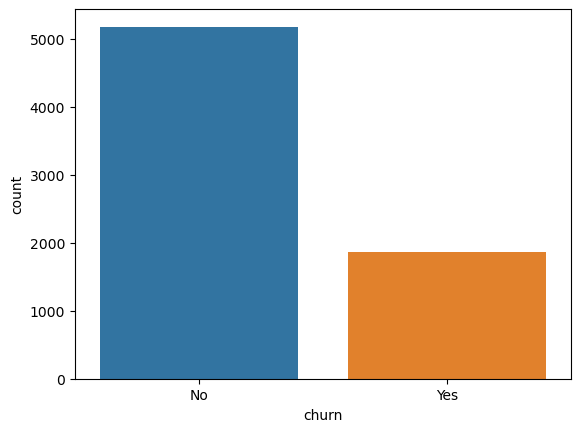

In [14]:
sns.countplot(x=df["churn"])

# 2. Does having tech support effect churn?

# A. Stat Test

### Categorical vs. Categorical

**Chi Square**

We will investigate the question of whether `churn` is independent of being a `senior_citizen`.

- $H_{0}$ (Null Hypothesis): `churn` is independent of being a `senior_citizen`. 

- $H_{a}$ (Alternative Hypothesis): `churn` is dependent on being a `senior_citizen`. 

In [15]:
group1='senior_citizen'
group2='churn'

In [16]:
# crosstab senior_citizen and tech_support
observed = pd.crosstab(df[group1], df[group2])
observed

churn,No,Yes
senior_citizen,,
0,4508,1393
1,666,476


In [17]:
# run chi2_contingency
alpha = 0.05
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [18]:
observed_out = observed.values

In [19]:
expected_out = expected.astype(int)

In [20]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed_out)

# print --- and then a new line, 'Expected Values', followed by another new line
print('------\nExpected Values\n')

# print the expected values array
print(expected_out)

# print a new line
print('-----\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2: .4f}')

# print the p-value, formatted to a float with 4 digits. 
print(f'p-value = {p: .4f}')
print('Is p-value < alpha?', p < alpha)

Observed Values

[[4508 1393]
 [ 666  476]]
------
Expected Values

[[4335 1565]
 [ 838  303]]
-----

chi^2 =  159.4263
p-value =  0.0000
Is p-value < alpha? True


In [21]:
# set alpha
alpha = 0.05

# define eval_results function
def eval_results(p, alpha, group1, group2):
    '''
    this function will take in the p-value, alpha, and a name for the 2 variables
    you are comparing (group1 and group2) and return a string stating 
    whether or not there exists a relationship between the 2 groups. 
    '''
    if p < alpha:
        return f'There exists some relationship between {group1} and {group2}. (p-value: {p:.4f})'
    else:
        return f'There is not a significant relationship between {group1} and {group2}. (p-value: {p:.4f})'

In [22]:
eval_results(p, alpha, group1, group2)

'There exists some relationship between senior_citizen and churn. (p-value: 0.0000)'

# B. Visualize

<AxesSubplot: xlabel='churn', ylabel='count'>

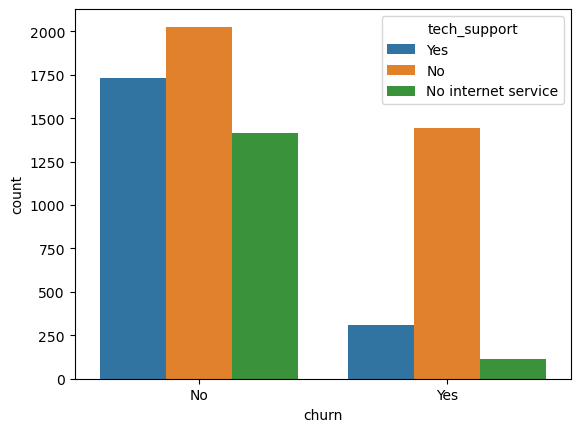

In [53]:
sns.countplot(data=df, x="churn", hue="tech_support")

In [ ]:
# Key Takeaways (1-2 sentences)

# 3. Does total addons affect churn?

# A. Stat Test

### Categorical vs. Categorical

**T-Test**

We will investigate the question of whether `total_addons` is independent of `churn`.

- $H_{0}$ (Null Hypothesis): `total_addons` is independent of `churn`. 

- $H_{a}$ (Alternative Hypothesis): `total_addons` is dependent on `churn`. 

In [ ]:
# df['C'] = df.apply(lambda row: row['A'] + row['B'], axis=1)

In [54]:
addons = ['online_security','online_backup','device_protection', 'tech_support', 'streaming_tv','streaming_movies']

In [55]:
addon_sum=(df[addons]=='Yes').sum(axis=1)

In [56]:
df=df.assign(addon_sum=addon_sum)

In [57]:
df['addon_sum']

0       3
1       1
2       1
3       4
4       2
       ..
7038    3
7039    0
7040    0
7041    1
7042    5
Name: addon_sum, Length: 7043, dtype: int64

In [58]:
group1='addon_sum'
group2='churn'

In [59]:
test=df[[group1,group2]]

In [60]:
test.dtypes

addon_sum     int64
churn        object
dtype: object

In [61]:
test.head(1)

,addon_sum,churn
0,3,No


In [62]:
df.addon_sum.value_counts()

0    2219
3    1118
2    1033
1     966
4     852
5     571
6     284
Name: addon_sum, dtype: int64

In [63]:
# crosstab senior_citizen and tech_support
observed = pd.crosstab(df[group1], df[group2])
observed

churn,No,Yes
addon_sum,,
0,1744,475
1,524,442
2,663,370
3,812,306
4,662,190
5,500,71
6,269,15


In [64]:
# run chi2_contingency
alpha = 0.05
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [65]:
observed_out = observed.values

In [66]:
expected_out = expected.astype(int)

In [67]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed_out)

# print --- and then a new line, 'Expected Values', followed by another new line
print('------\nExpected Values\n')

# print the expected values array
print(expected_out)

# print a new line
print('-----\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2: .4f}')

# print the p-value, formatted to a float with 4 digits. 
print(f'p-value = {p: .4f}')
print('Is p-value < alpha?', p < alpha)

Observed Values

[[1744  475]
 [ 524  442]
 [ 663  370]
 [ 812  306]
 [ 662  190]
 [ 500   71]
 [ 269   15]]
------
Expected Values

[[1630  588]
 [ 709  256]
 [ 758  274]
 [ 821  296]
 [ 625  226]
 [ 419  151]
 [ 208   75]]
-----

chi^2 =  390.9430
p-value =  0.0000
Is p-value < alpha? True


In [68]:
# set alpha
alpha = 0.05

# define eval_results function
def eval_results(p, alpha, group1, group2):
    '''
    this function will take in the p-value, alpha, and a name for the 2 variables
    you are comparing (group1 and group2) and return a string stating 
    whether or not there exists a relationship between the 2 groups. 
    '''
    if p < alpha:
        return f'There exists some relationship between {group1} and {group2}. (p-value: {p:.4f})'
    else:
        return f'There is not a significant relationship between {group1} and {group2}. (p-value: {p:.4f})'

In [69]:
eval_results(p, alpha, group1, group2)

'There exists some relationship between addon_sum and churn. (p-value: 0.0000)'

# B. Visualize

In [70]:
CrosstabResult=pd.crosstab(index=df[group1],columns=df[group2])

<AxesSubplot: xlabel='addon_sum'>

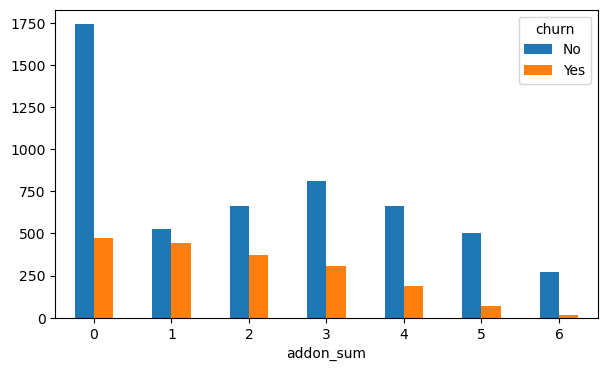

In [71]:
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

In [115]:
df['addon_sum']

0       3
1       1
2       1
3       4
4       2
       ..
7038    3
7039    0
7040    0
7041    1
7042    5
Name: addon_sum, Length: 7043, dtype: int64

In [121]:
df['churn_check'] = df['churn']=='Yes'

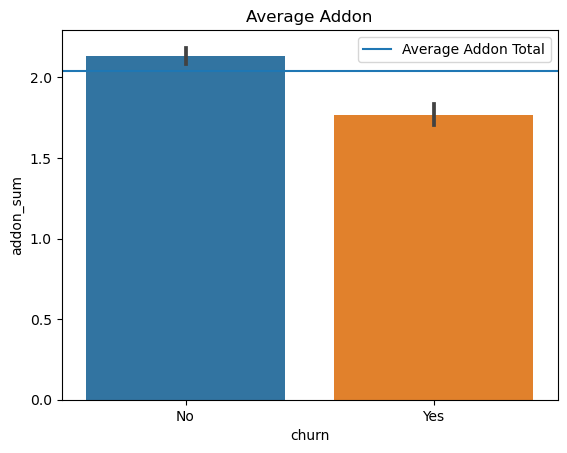

In [126]:
plt.title("Average Addon")
sns.barplot(x="churn", y="addon_sum", data=dfd)
total_addon_average = df["addon_sum"].mean()
plt.axhline(total_addon_average, label="Average Addon Total")
plt.legend()
plt.show()

In [152]:
df.groupby(['addon_sum'])['churn_check'].aggregate('mean')

addon_sum
0    0.214060
1    0.457557
2    0.358180
3    0.273703
4    0.223005
5    0.124343
6    0.052817
Name: churn_check, dtype: float64

In [ ]:
glue = sns.load_dataset("glue").pivot("Model", "Task", "Score")
sns.heatmap(glue)

# RELPLOT
continuous vs continous

# 4. Does being a senior citizen affect churn?

# A. Stat Test

### Categorical vs. Categorical

**T-Test**

We will investigate the question of whether `senior_citizen` is independent of `churn`.

- $H_{0}$ (Null Hypothesis): `senior_citizen` is independent of `churn`. 

- $H_{a}$ (Alternative Hypothesis): `senior_citizen` is dependent on `churn`. 

In [127]:
group1='senior_citizen'
group2='churn'

In [132]:
test=df[[group1,group2,'churn_check']]

In [133]:
test.dtypes

senior_citizen     int64
churn             object
churn_check         bool
dtype: object

In [134]:
test.head(1)

,senior_citizen,churn,churn_check
0,0,No,False


In [136]:
df[group1].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [137]:
# crosstab senior_citizen and tech_support
observed = pd.crosstab(df[group1], df[group2])
observed

churn,No,Yes
senior_citizen,,
0,4508,1393
1,666,476


In [138]:
# run chi2_contingency
alpha = 0.05
chi2, p, dof, expected = stats.chi2_contingency(observed)

In [139]:
observed_out = observed.values

In [140]:
expected_out = expected.astype(int)

In [141]:
# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(observed_out)

# print --- and then a new line, 'Expected Values', followed by another new line
print('------\nExpected Values\n')

# print the expected values array
print(expected_out)

# print a new line
print('-----\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2: .4f}')

# print the p-value, formatted to a float with 4 digits. 
print(f'p-value = {p: .4f}')
print('Is p-value < alpha?', p < alpha)

Observed Values

[[4508 1393]
 [ 666  476]]
------
Expected Values

[[4335 1565]
 [ 838  303]]
-----

chi^2 =  159.4263
p-value =  0.0000
Is p-value < alpha? True


In [142]:
# set alpha
alpha = 0.05

# define eval_results function
def eval_results(p, alpha, group1, group2):
    '''
    this function will take in the p-value, alpha, and a name for the 2 variables
    you are comparing (group1 and group2) and return a string stating 
    whether or not there exists a relationship between the 2 groups. 
    '''
    if p < alpha:
        return f'There exists some relationship between {group1} and {group2}. (p-value: {p:.4f})'
    else:
        return f'There is not a significant relationship between {group1} and {group2}. (p-value: {p:.4f})'

In [143]:
eval_results(p, alpha, group1, group2)

'There exists some relationship between senior_citizen and churn. (p-value: 0.0000)'

# B. Visualize

<AxesSubplot: xlabel='churn', ylabel='count'>

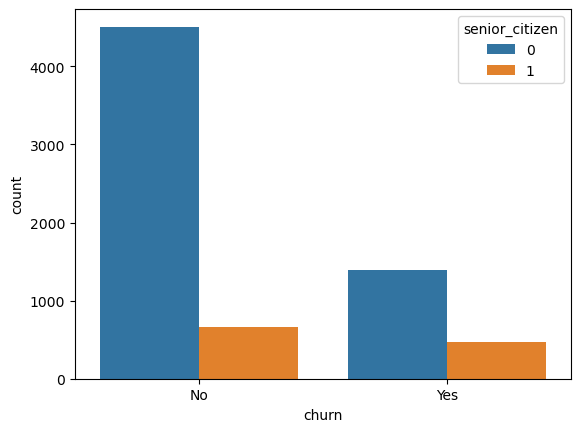

In [153]:
sns.countplot(data=df, x="churn", hue="senior_citizen")

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

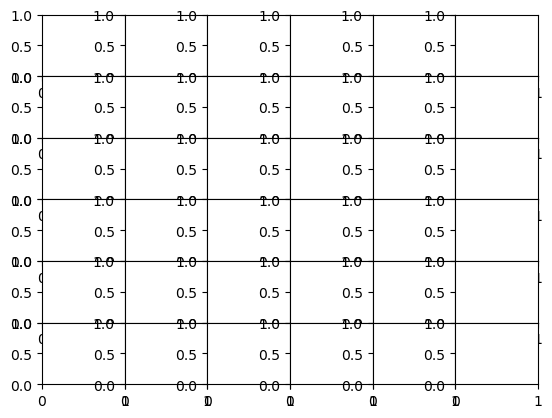

In [154]:
pd.plotting.scatter_matrix(df)
plt.show()